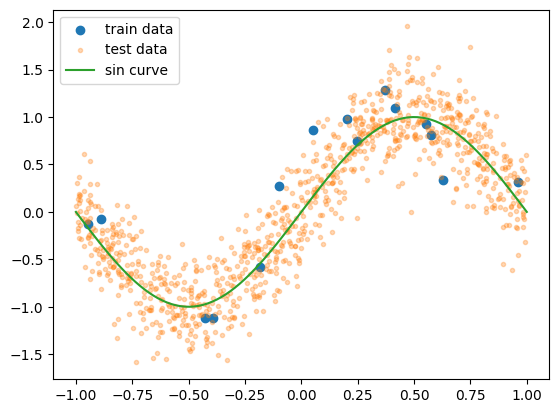

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import scipy.optimize as optimize

np.random.seed(40)


# generate data like sin curve
def generate_data(n, sigma):
    x = np.random.uniform(-1, 1, n)
    y = np.sin(np.pi * x) + np.random.normal(0, sigma, n)
    return x, y

train_data = generate_data(15, 0.3)
test_data = generate_data(1000, 0.3)
plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')
plt.scatter(test_data[0], test_data[1], marker=".", c='tab:orange', label='test data', alpha=0.3)

x = np.linspace(-1, 1, 100)
y = np.sin(np.pi * x)
plt.plot(x, y, c='tab:green', label='sin curve')
plt.legend()
plt.show()

deg is 2 loss 3.6257953321277894	train error 0.26837941547759264	test error 0.29778591495653334
deg is 3 loss 2.788699511663663	train error 0.09030230831839016	test error 0.13980223863383184
deg is 4 loss 2.788699761158394	train error 0.09025180489637746	test error 0.13974268079129365
deg is 5 loss 2.722412064054891	train error 0.09937490706324338	test error 0.14165502958151166
deg is 6 loss 2.719278542840681	train error 0.09193289151636536	test error 0.13495595978374547
deg is 7 loss 2.7342516193916424	train error 0.09135567422837317	test error 0.13507909647255814
deg is 8 loss 2.7151479102045037	train error 0.09644571170225495	test error 0.13849331865985848
deg is 9 loss 2.717623931611056	train error 0.09449080544167365	test error 0.13757331608843038
deg is 10 loss 2.724078285287721	train error 0.09219827445674662	test error 0.1362084671066479
deg is 11 loss 2.7421674826325213	train error 0.09285775140465154	test error 0.13673071112294855
deg is 12 loss 2.76681506238269	train error 0

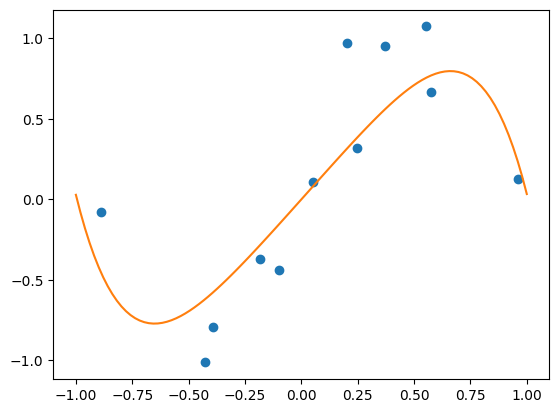

In [84]:
degree = 50 # 多項式の次数

y = train_data[1]
alpha = 0.5 # 正則化項の係数

beta_prev = np.random.randn(1)

train_loss = []
test_loss = []
for deg in range(2, degree+1):
    beta_init = np.append(-beta_prev, 1)

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly = poly_features.fit_transform(train_data[0].reshape(-1, 1))

    def ridge_loss(beta, x_poly=x_poly,  y=y, alpha=alpha):
        y_pred = np.dot(x_poly, beta)
        err = (y - y_pred) ** 2
        return np.sum(err) + alpha * np.sum(np.abs(beta))

    res = optimize.minimize(ridge_loss, beta_init)
    print("deg is", deg, "loss", res.fun, end="\t")
    print("train error", mean_squared_error(y, np.dot(x_poly, res.x)), end="\t")
    train_loss.append(mean_squared_error(y, np.dot(x_poly, res.x)))
    print("test error", mean_squared_error(test_data[1], np.dot(poly_features.fit_transform(test_data[0].reshape(-1, 1)), res.x)))
    test_loss.append(mean_squared_error(test_data[1], np.dot(poly_features.fit_transform(test_data[0].reshape(-1, 1)), res.x)))

    beta_prev = res.x

poly_features = PolynomialFeatures(degree=degree, include_bias=False)
xx = np.linspace(-1, 1, 100)
plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')
plt.plot(xx, poly_features.fit_transform(xx.reshape(-1, 1)) @ beta_prev, c='tab:orange', label='fitted curve')

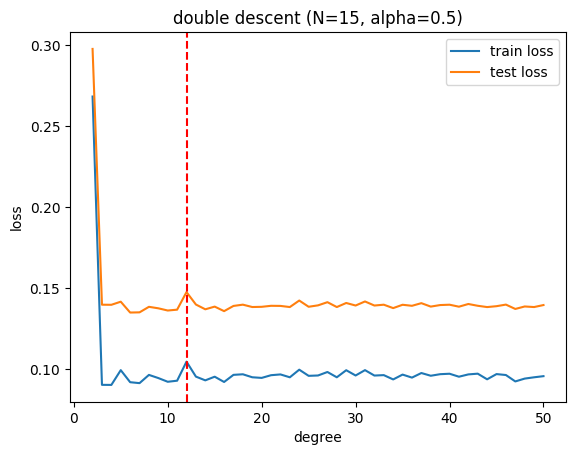

In [85]:
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=12, color='red', linestyle='--')
plt.title(f'double descent (N=15, alpha={alpha})')
# plt.xscale('log')
plt.legend()
plt.show()

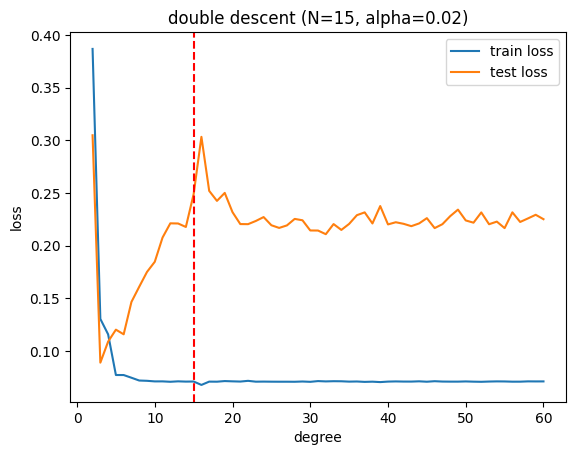

In [70]:
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.title(f'double descent (N=15, alpha={alpha})')
# plt.xscale('log')
plt.legend()
plt.show()

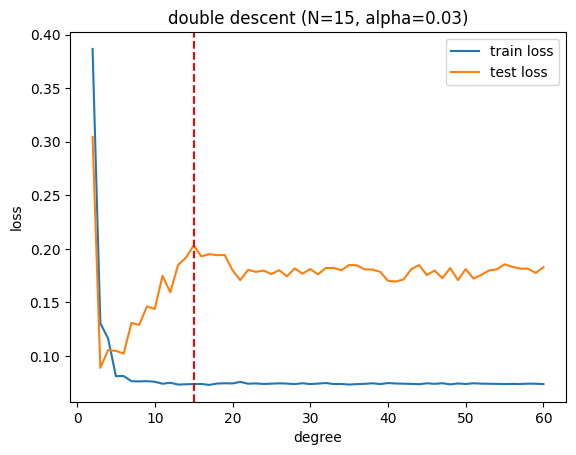

In [66]:
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.title(f'double descent (N=15, alpha={alpha})')
# plt.xscale('log')
plt.legend()
plt.show()

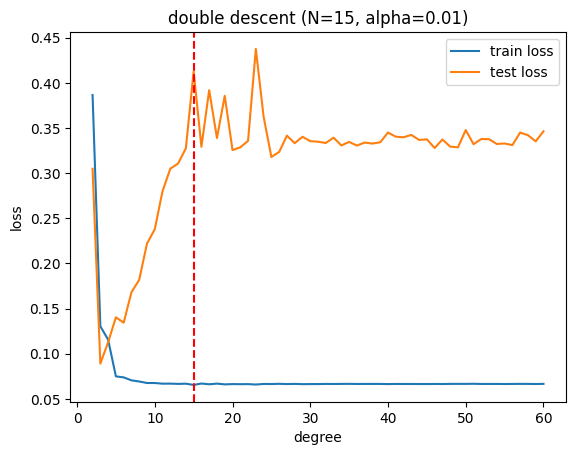

In [62]:
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.title(f'double descent (N=15, alpha={alpha})')
plt.legend()
plt.show()

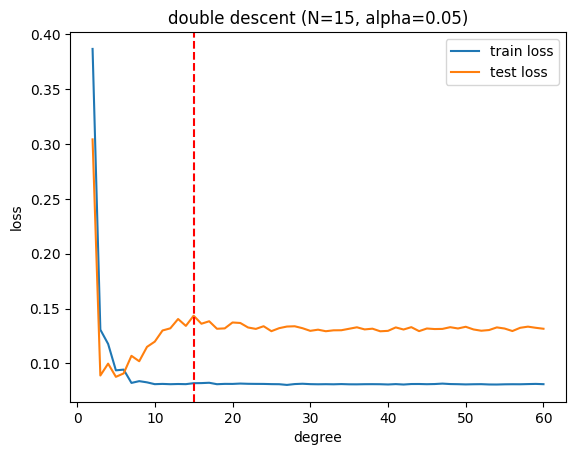

In [58]:
plt.plot(range(2, degree+1), train_loss, label='train loss')
plt.plot(range(2, degree+1), test_loss, label='test loss')
plt.xlabel('degree')
plt.ylabel('loss')
plt.axvline(x=15, color='red', linestyle='--')
plt.title('double descent (N=15, alpha=0.05)')
plt.legend()
plt.show()